# WEEK 6:DAY 3- Regularized Regression
Regularization techniques are used to caliberate linear regression model in order to minimize the adjusted 
loss function and prevent overfitting and underfitting


# Types of regularization
1) ridge: it modifies the overfitted and underfitted models by adding the penalty equivalent to the sum of squares of magnitude of coefficients
2) Lasso:it modifies the overfitted and underfitted models by adding the penalty equivalent to the sum of the absolute value of the coefficients

## Import the libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import warnings

In [4]:
# loading pre_defined Boston Dataset
boston_dataset = datasets.load_boston()

In [6]:
# Load the dataset 
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)
# input 
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:,-1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [9]:
x_train,x_test, y_train, y_test = train_test_split(boston_pd.iloc[:,:-1], boston_pd.iloc[:,-1] ,test_size = 0.25)

print("Train data shape of X = % s and Y = % s :"%(x_train.shape, y_train.shape))

print("Test data shape of X =% s and Y = % s : "%(x_train.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) :
Test data shape of X =(379, 13) and Y = (127,) : 


In [14]:
# apply multiple Linear Regression Model 
lreg= LinearRegression()
lreg.fit(x_train,y_train)

# Generate predictions on the test set 
lreg_y_pred = lreg.predict(x_test)
# calculating Mean Squared Error (mse)
mean_square_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean Squared Error on test set : ", mean_square_error)

# Putting together the coefficient and their corresponding variable names 
lreg_coefficient = pd.DataFrame()
lreg_coefficient["columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)


Mean Squared Error on test set :  27.521467038391563
    columns  Coefficient Estimate
0      CRIM             -0.090480
1        ZN              0.044697
2     INDUS             -0.012383
3      CHAS              1.758528
4       NOX            -12.827306
5        RM              3.698781
6       AGE              0.007503
7       DIS             -1.302185
8       RAD              0.333776
9       TAX             -0.013877
10  PTRATIO             -1.001451
11        B              0.011598
12    LSTAT             -0.581414


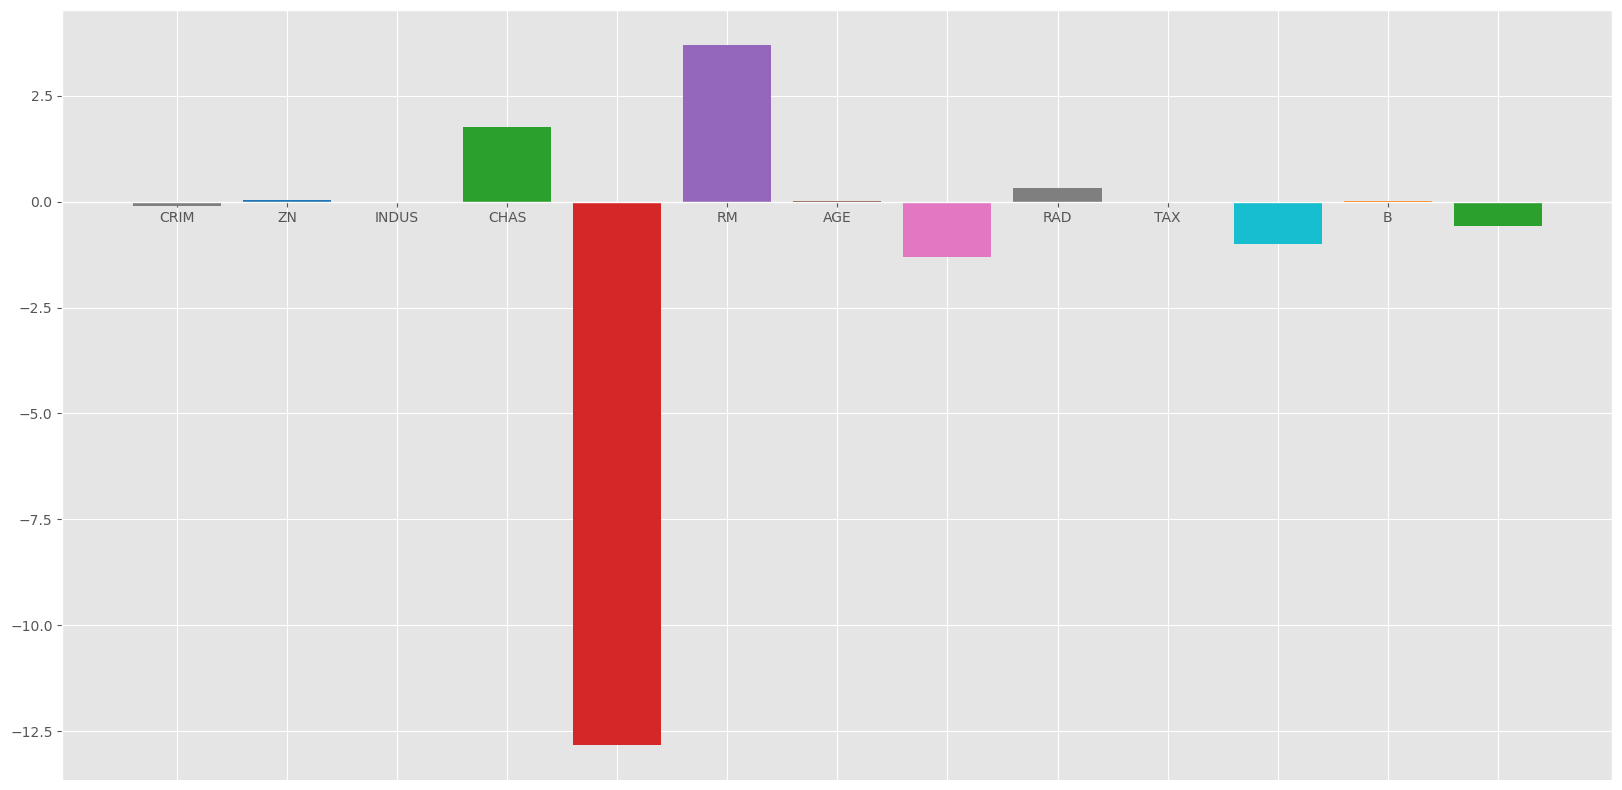

In [23]:
# Plotting the coefficient score
fig, ax = plt.subplots(figsize= (20,10))
color =['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink'
        , 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lreg_coefficient["columns"],
lreg_coefficient['Coefficient Estimate'], 
color = color)
ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()
       

# Ridge Regression 
our aim is to reduce the coefficient score 

In [18]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge

In [21]:
# Train the model 
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train,y_train)
y_pred = ridgeR.predict(x_test)

#calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print("Mean square error on test set", mean_squared_error_ridge)

# get theridge coefficient and print them 
ridge_coefficient = pd.DataFrame()
ridge_coefficient["columns"] = x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)



Mean square error on test set 28.527683067180114
    columns  Coefficient Estimate
0      CRIM             -0.087766
1        ZN              0.045112
2     INDUS             -0.036463
3      CHAS              1.679657
4       NOX             -6.529355
5        RM              3.680783
6       AGE              0.002207
7       DIS             -1.205240
8       RAD              0.330161
9       TAX             -0.014995
10  PTRATIO             -0.948764
11        B              0.011886
12    LSTAT             -0.590904


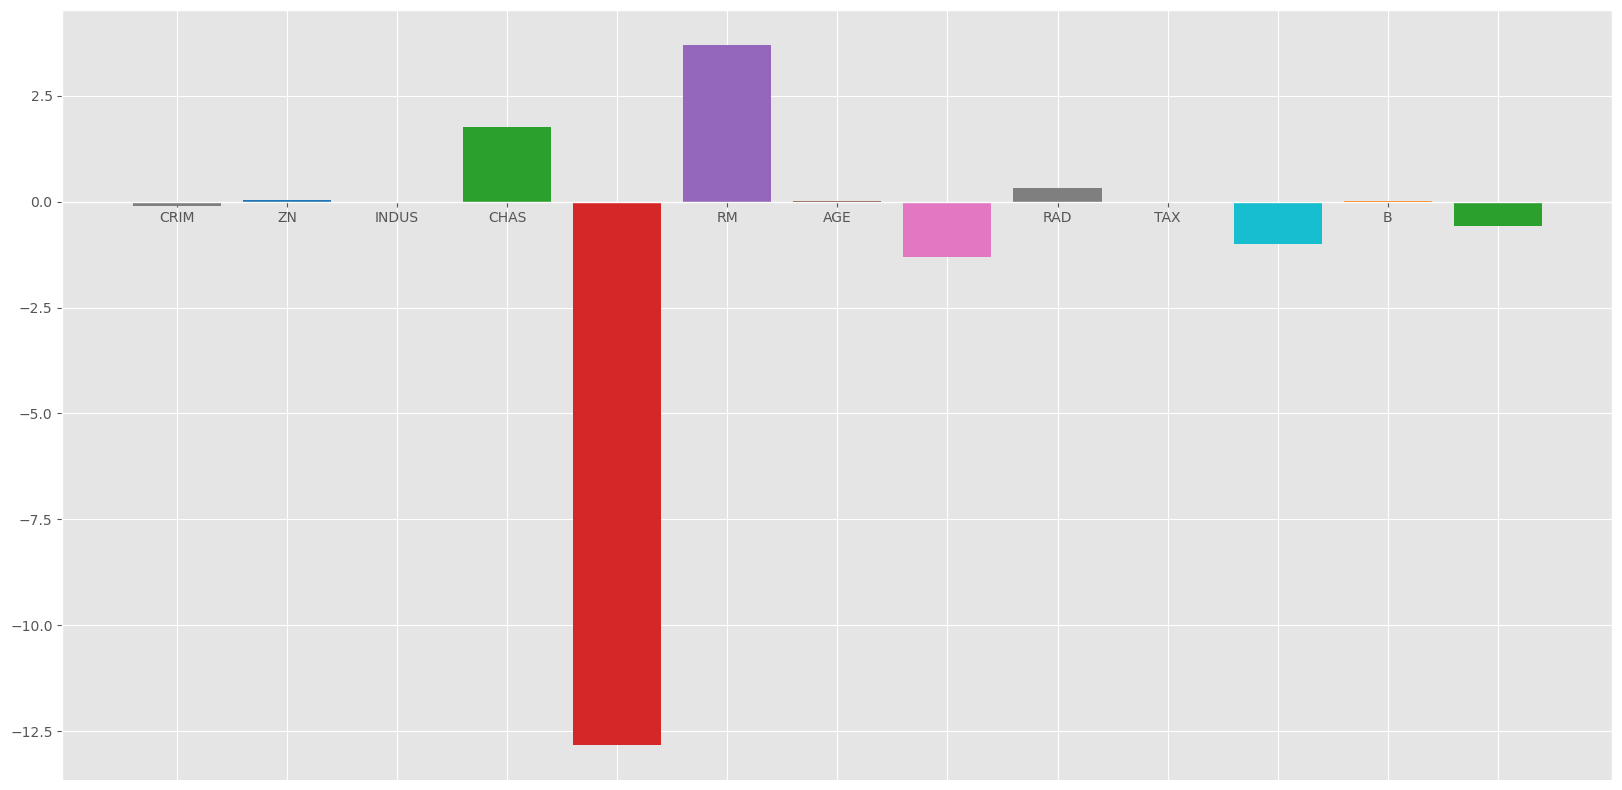

In [22]:
fig, ax = plt.subplots(figsize= (20,10))
color =['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink'
        , 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lreg_coefficient["columns"],
lreg_coefficient['Coefficient Estimate'], 
color = color)
ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()
       

# Lasso Regression

In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1)

In [31]:
# Train the model 
lasso = Lasso(alpha = 1)
lasso.fit(x_train,y_train)
y_pred1 = lasso.predict(x_test)

#calculate mean square error 
mean_squared_error_lasso = np.mean((y_pred1 - y_test)**2)
print("Mean square error on test set", mean_squared_error_lasso)

# get theridge coefficient and print them 
lasso_coefficient = pd.DataFrame()
lasso_coefficient["columns"] = x_train.columns
lasso_coefficient['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coefficient)



Mean square error on test set 35.86886303452771
    columns  Coefficient Estimate
0      CRIM             -0.056822
1        ZN              0.050932
2     INDUS             -0.000876
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.531986
6       AGE              0.031318
7       DIS             -0.588150
8       RAD              0.346039
9       TAX             -0.018310
10  PTRATIO             -0.864091
11        B              0.009848
12    LSTAT             -0.826779
